In [204]:
import pandas as pd

df=pd.read_csv("C:/Min/개인공부/BDA 6기/데이터/NH거래고객데이터.csv")

# 기업이라면?
이탈할 고객, 이탈하지 않을 고객, 이탈할 가능성이 크거나 작은 고객 등등 고객의 이탈에 대해 분류하고 싶을 것이다. 

->  kmeans를 통해 이탈 고객을 clustering 해보자!

# 가설 세우기
1. 투자성향이 공격적일수록 금방 이탈할 것이다
2. 고객등급이 높을수록 이탈이 적을 것이다.
3. 나이가 많을수록 자산이 많고, 이탈이 적을 것이다.
4. 투자기간이 짧을수록 이탈 가능성이 높을 것이다.

In [205]:
df

,Unnamed: 0,계좌,성별,연령구간,투자성향,고객자산구간,주거래상품군,LIFESTAGE,고객등급,총투자기간,주거래업종구분
0,0,64aae8dd71e5c0761000db9f9a6779e504e7a4aa9dc097...,1,4,99,1,2,3,3,6,16
1,1,5f7c3a8f37d9c268d06130ff0be5d32a1b9ef68c13049f...,1,6,4,4,2,5,2,6,1
2,2,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,2,7,4,3,2,5,5,6,9
3,3,6d497facfa1ea5901b827335553331f8555fec02a8184f...,2,6,4,4,8,5,3,6,16
4,4,b727c78d2cfc246c97b677f29a034399a0c7e7873fff44...,1,5,2,2,2,5,5,5,16
...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,2fdd734bf8fc04c0d484ddc1d021622a1cdc802705702e...,1,9,4,2,2,9,5,2,16
9996,9996,720aa28d24bfa8fbeddf4fe625cb53af0a6f7ff2d526de...,2,2,3,1,2,2,9,1,16
9997,9997,7702030b3b0760e6b37c8a3e8ed58611b1b85913526ad1...,2,7,4,2,2,5,5,2,16
9998,9998,4006ddaa5673365096b9dd5965e20db866f6523c162f79...,1,5,99,5,2,5,3,2,5


In [206]:
df.info()
#결측치 없는 수치형 데이터들이구나

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10000 non-null  int64 
 1   계좌          10000 non-null  object
 2   성별          10000 non-null  int64 
 3   연령구간        10000 non-null  int64 
 4   투자성향        10000 non-null  int64 
 5   고객자산구간      10000 non-null  int64 
 6   주거래상품군      10000 non-null  int64 
 7   LIFESTAGE   10000 non-null  int64 
 8   고객등급        10000 non-null  int64 
 9   총투자기간       10000 non-null  int64 
 10  주거래업종구분     10000 non-null  int64 
dtypes: int64(10), object(1)
memory usage: 859.5+ KB


In [207]:
df.columns

Index(['Unnamed: 0', '계좌', '성별', '연령구간', '투자성향', '고객자산구간', '주거래상품군',
       'LIFESTAGE', '고객등급', '총투자기간', '주거래업종구분'],
      dtype='object')

In [249]:
#클러스터링에 쓸 컬럼만 뽑기
df_sp=df[['연령구간','투자성향', '고객등급', '총투자기간']]

In [250]:
df_sp.head()

,연령구간,투자성향,고객등급,총투자기간
0,4,99,3,6
1,6,4,2,6
2,7,4,5,6
3,6,4,3,6
4,5,2,5,5


In [251]:
for i in df_sp.columns:
    print(i,'컬럼의 분포 상태')
    print(df_sp[i].value_counts())
    print('--------------------------------\n')

연령구간 컬럼의 분포 상태
4    1567
3    1524
6    1415
2    1378
5    1369
7    1098
8     787
1     481
9     381
Name: 연령구간, dtype: int64
--------------------------------

투자성향 컬럼의 분포 상태
99    3687
4     1858
3     1669
2     1467
5      935
1      210
0      171
9        3
Name: 투자성향, dtype: int64
--------------------------------

고객등급 컬럼의 분포 상태
9     3366
5     2687
4     2298
3     1184
2      345
1       83
99      37
Name: 고객등급, dtype: int64
--------------------------------

총투자기간 컬럼의 분포 상태
3    4271
2    3315
4     992
1     962
5     312
6     148
Name: 총투자기간, dtype: int64
--------------------------------



In [252]:
# 컬럼 중 미정의 값들 제거
df_sp=df_sp[(df_sp['투자성향']!=99)&((df_sp['고객등급']!=9)&(df_sp['고객등급']!=99))]

In [253]:
for i in df_sp.columns:
    print(i,'컬럼의 분포 상태')
    print(df_sp[i].value_counts())
    print('--------------------------------\n')

연령구간 컬럼의 분포 상태
4    761
3    718
5    683
6    628
2    543
7    517
8    367
9    169
1    108
Name: 연령구간, dtype: int64
--------------------------------

투자성향 컬럼의 분포 상태
4    1449
3    1186
2     851
5     807
0     114
1      84
9       3
Name: 투자성향, dtype: int64
--------------------------------

고객등급 컬럼의 분포 상태
5    1704
4    1536
3     900
2     284
1      70
Name: 고객등급, dtype: int64
--------------------------------

총투자기간 컬럼의 분포 상태
3    2218
2    1291
4     549
5     211
1     118
6     107
Name: 총투자기간, dtype: int64
--------------------------------



In [254]:
df_sp.describe()

,연령구간,투자성향,고객등급,총투자기간
count,4494.000000,4494.000000,4494.000000,4494.000000
mean,4.817757,3.382733,4.005785,2.947708
std,2.045648,1.187862,0.986200,0.956046
min,1.000000,0.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,2.000000
50%,5.000000,4.000000,4.000000,3.000000
75%,6.000000,4.000000,5.000000,3.000000
max,9.000000,9.000000,5.000000,6.000000


In [255]:
# 컬럼마다 간격 다르기 때문에 스케일링 진행
# robust스케일링 할거다

from sklearn.preprocessing import RobustScaler

RB=RobustScaler()
df_sp_rb=RB.fit_transform(df_sp)

In [256]:
df_sp_rb=pd.DataFrame(df_sp_rb, columns=df_sp.columns)

In [257]:
df_sp_rb

,연령구간,투자성향,고객등급,총투자기간
0,0.333333,0.0,-1.0,3.0
1,0.666667,0.0,0.5,3.0
2,0.333333,0.0,-0.5,3.0
3,0.000000,-2.0,0.5,2.0
4,0.000000,-1.0,0.0,3.0
...,...,...,...,...
4489,-0.666667,1.0,0.5,-2.0
4490,0.333333,-3.0,0.5,-1.0
4491,1.333333,0.0,0.5,-1.0
4492,0.666667,0.0,0.5,-1.0


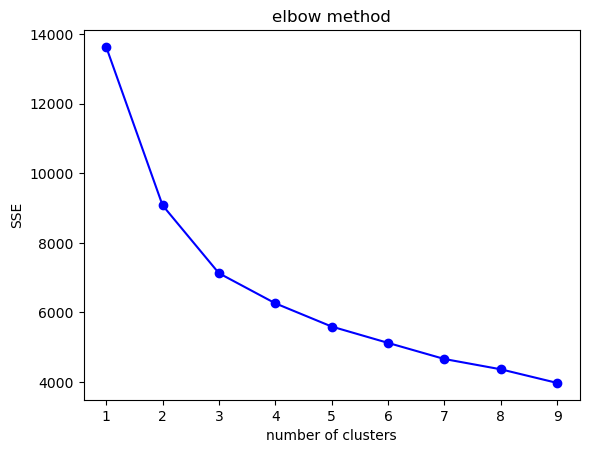

In [258]:
from sklearn.cluster import KMeans

def elbow(data, length):
    sse = [] # sum of squre error 오차제곱합
    for i in range(1, length):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(df_sp_rb)
        # SSE 값 저장
        sse.append(kmeans.inertia_)
    plt.plot(range(1, length), sse, 'bo-')
    plt.title("elbow method")
    plt.xlabel("number of clusters")
    plt.ylabel("SSE")
    plt.show()
elbow(df_sp_rb,10 )

In [259]:
# 엘보우 기법에 따라 k=3 결정
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_sp_rb)
df_sp_rb['cluster']=kmeans.labels_

In [260]:
df_sp_rb['cluster']=kmeans.labels_

In [261]:
df_sp_rb

,연령구간,투자성향,고객등급,총투자기간,cluster
0,0.333333,0.0,-1.0,3.0,0
1,0.666667,0.0,0.5,3.0,0
2,0.333333,0.0,-0.5,3.0,0
3,0.000000,-2.0,0.5,2.0,0
4,0.000000,-1.0,0.0,3.0,0
...,...,...,...,...,...
4489,-0.666667,1.0,0.5,-2.0,2
4490,0.333333,-3.0,0.5,-1.0,1
4491,1.333333,0.0,0.5,-1.0,2
4492,0.666667,0.0,0.5,-1.0,2


In [262]:
df_sp['cluster']=kmeans.labels_

In [263]:
df_sp

,연령구간,투자성향,고객등급,총투자기간,cluster
1,6,4,2,6,0
2,7,4,5,6,0
3,6,4,3,6,0
4,5,2,5,5,0
5,5,3,4,6,0
...,...,...,...,...,...
9980,3,5,5,1,2
9993,6,1,5,2,1
9995,9,4,5,2,2
9997,7,4,5,2,2


In [264]:
df_1=df[(df['투자성향']!=99)&((df['고객등급']!=9)&(df['고객등급']!=99))]

In [265]:
df_1['cluster']=kmeans.labels_

C:\Temp\ipykernel_13952\490660418.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['cluster']=kmeans.labels_


In [266]:
df_1

,Unnamed: 0,계좌,성별,연령구간,투자성향,고객자산구간,주거래상품군,LIFESTAGE,고객등급,총투자기간,주거래업종구분,cluster
1,1,5f7c3a8f37d9c268d06130ff0be5d32a1b9ef68c13049f...,1,6,4,4,2,5,2,6,1,0
2,2,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,2,7,4,3,2,5,5,6,9,0
3,3,6d497facfa1ea5901b827335553331f8555fec02a8184f...,2,6,4,4,8,5,3,6,16,0
4,4,b727c78d2cfc246c97b677f29a034399a0c7e7873fff44...,1,5,2,2,2,5,5,5,16,0
5,5,4f330270cd37d758fbe9dfe45e0c40ed4579ab6b87a648...,1,5,3,4,2,5,4,6,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9980,9980,aae67ac5ae3cafeb9904705cc970584731e31a4c24c56f...,1,3,5,1,2,3,5,1,5,2
9993,9993,6d1dde7a559a771e6f88990cd697564226fa89ecffa728...,1,6,1,1,2,7,5,2,10,1
9995,9995,2fdd734bf8fc04c0d484ddc1d021622a1cdc802705702e...,1,9,4,2,2,9,5,2,16,2
9997,9997,7702030b3b0760e6b37c8a3e8ed58611b1b85913526ad1...,2,7,4,2,2,5,5,2,16,2


In [273]:
df_sp.groupby(['cluster']).count()

#군집 별 고객이 1,2,0 순으로 많지만 1,2 규모가 압도적으로 크다

,연령구간,투자성향,고객등급,총투자기간
cluster,,,,
0,774,774,774,774
1,2005,2005,2005,2005
2,1715,1715,1715,1715


In [269]:
df_sp.groupby(['cluster']).mean()

,연령구간,투자성향,고객등급,총투자기간
cluster,,,,
0,5.572351,3.948320,3.555556,4.525840
1,4.585037,2.338653,4.264339,2.599501
2,4.749271,4.348105,3.906706,2.642566


- 연령구간 : (낮을수록 이탈 가설) -> 0-2-1 순
- 투자성향 : (높을수록 이탈 가설) -> 2-0-1 순
- 고객등급 : (낮을수록 이탈 가설) -> 0-2-1 순
- 총투자기간 : (낮을수록 이탈 가설) ->  0-2-1 순

#### 클러스터 별 특징과 마케팅 전략 (1>2>0)
- 클러스터 0 : 연령구간 높고 투자성향 중상 (적극투자), 고객등급 상, 총투자기간 상  

    1 ) 연령구간이 제일 높아 중장년~고령층으로 예상됨
    
    2 ) 고객등급이 높고 투자기간도 긴 주요 고객층
    
    3 ) 이탈 가능성이 적다고 볼 수 있음. 적극적 상품 홍보 필요


- 클러스터 1 : 연령구간 낮고 투자성향 하(안정추구 - 위험중립) 고객등급 하 총투자기간 하

    １）연령대가 제일 낮고 투자기간이 짧음 (이탈 가능성 농후함)
        
    -> 최근 은행사에서 젊은층을 겨냥한 프로모션 경쟁이 치열하기 때문에 이를 대비한 상품 개발 필요함
    
    ２）투자성향이 공격적이지 않음. 이들에게 안정성이 보장된 고금리 장기 상품 추천시 긍정적 효과 예상됨
        

- 클러스터 2 : 연령구간 중간 투자성향 상 (적극 - 공격) 고객등급 중하 총투자기간 중하

    1 ) 투자성향이 타 군집에 비해 공격적. 주식 붐으로 유입된 군집으로 추정할 수 있음
    
    2 ) 유동성이 큰 시장에서 선물옵션 추천이 도움이 될 것이라 예상됨
    
    3 ) 특히 빠르게 돌아가는 금융시장에 관심이 많기에 앱 푸시알림으로 시장 정보 알림 기능으로 끌어들일 수 있음



*예상보다 군집형성에 연령구간이 뚜렷한 차이가 있지 않았음*

In [274]:
#군집화 시각화 확인

from sklearn.decomposition import PCA
X = df_sp_rb[['연령구간','투자성향','고객등급','총투자기간']]

#객체
pca = PCA(n_components=2)

#적용
pca.fit(X)
x_pca = pca.transform(X)
x_pca

array([[ 1.73792054,  2.71202373],
       [ 1.56099772,  2.62929762],
       [ 1.66808537,  2.65372297],
       ...,
       [ 0.33584054, -0.73031902],
       [ 0.27067515, -0.91467135],
       [-2.37874927,  3.18168306]])

In [271]:
#x_pca를 보기 쉽게 데이터프레임으로 만들기
pca_df = pd.DataFrame(x_pca)
pca_df['cluster'] = kmeans.labels_
pca_df.head()

,0,1,cluster
0,1.737921,2.712024,0
1,1.560998,2.629298,0
2,1.668085,2.653723,0
3,-0.688875,2.265929,0
4,0.634604,2.856734,0


C:\Users\gram\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


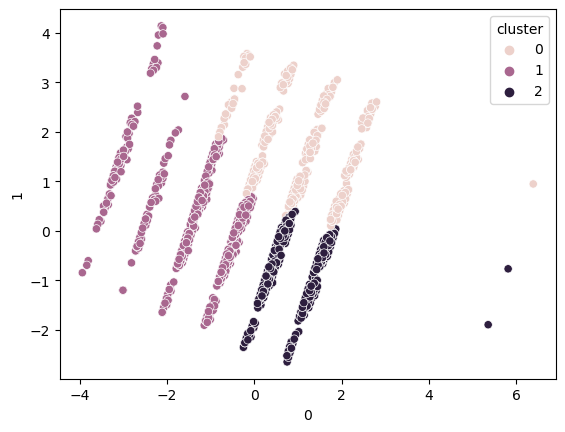

In [272]:
import matplotlib.pyplot as plt
import seaborn as sns
axs = plt.subplots()
axs = sns.scatterplot(0, 1, hue='cluster', data=pca_df)

#값이 겹치지 않고 잘 구분되고 있음을 알 수 있다!